In [84]:
import numpy as np
from matplotlib import pyplot as plt 
from pandas import read_csv
import sys
import os
from matplotlib import rcParams
import toml

from correlations import *
from read_in_data import *
from mass_fit import *
from mass_matteo import *
from functions import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


UsageError: Line magic function `%%capture` not found.


# Read data

In [144]:
p = ("physics", "mass")
simulations = []
for i in range(7, 18):
    dataset = Dataset(16, 16)
    dataset.add_data("./data/allsim/conf" + str(i) + "/", p, 1)
    simulations.append(dataset)
for i in range(18, 29):
    dataset = Dataset(32, 32)
    dataset.add_data("./data/allsim/conf" + str(i) + "/", p, 1)
    simulations.append(dataset)
for i in range(29, 40):
    dataset = Dataset(64, 64)
    dataset.add_data("./data/allsim/conf" + str(i) + "/", p, 1)
    simulations.append(dataset)

# Magnetisation

Text(0, 0.5, '$\\left\\langle |\\phi| \\right\\rangle$')

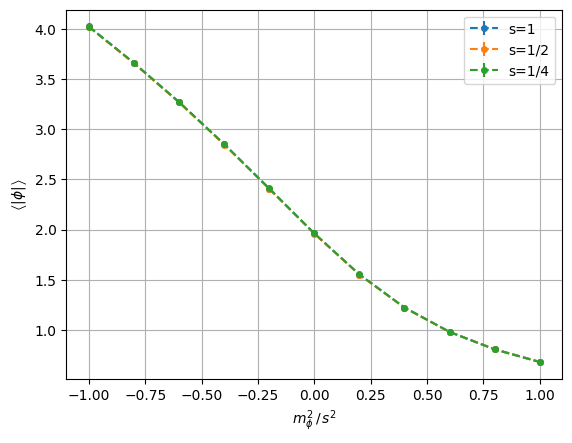

In [150]:
param = ("physics", "mass")

# s = 1.0
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 1:
        val, err = s.compute_mag(printing=False)
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2 for m2 in params], vals, errs, fmt='o--', markersize=4, label="s=1")

# s = 0.5
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.5:
        val, err = s.compute_mag(printing=False)
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2/0.5/0.5 for m2 in params], vals, errs, fmt='o--', markersize=4, label="s=1/2")

# s = 0.25
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.25:
        val, err = s.compute_abs_mag(printing=False)
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2/0.25/0.25 for m2 in params], vals, errs, fmt='o--', markersize=4, label="s=1/4")

plt.legend()
plt.grid()
plt.xlabel(r"$m_\phi^2 \, / \, s^2$")
plt.ylabel(r"$\left\langle |\phi| \right\rangle$")

# Susceptibility

Text(0, 0.5, '$\\chi^2 \\, / \\, V$')

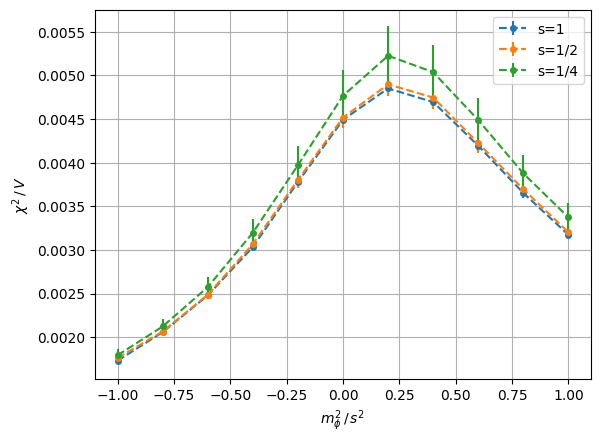

In [151]:
param = ("physics", "mass")

# s = 1.0
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 1:
        val, err = s.compute_susceptibility(printing=False)
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2 for m2 in params], vals, errs, fmt='o--', markersize=4, label="s=1")

# s = 0.5
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.5:
        val, err = s.compute_susceptibility(printing=False)
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2/0.5/0.5 for m2 in params], vals, errs, fmt='o--', markersize=4, label="s=1/2")

# s = 0.25
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.25:
        val, err = s.compute_susceptibility(printing=False)
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2/0.25/0.25 for m2 in params], vals, errs, fmt='o--', markersize=4, label="s=1/4")

plt.legend()
plt.grid()
plt.xlabel(r"$m_\phi^2 \, / \, s^2$")
plt.ylabel(r"$\chi^2 \, / \, V$")

# Renormalised boson mass

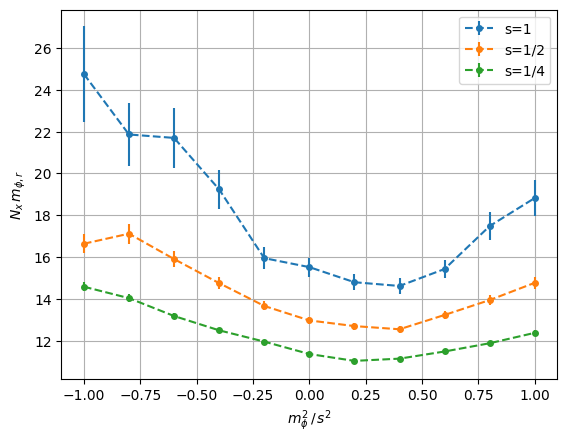

In [167]:
param = ("physics", "mass")

# s = 1.0
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 1:
        Nx = s.Nx
        val, err = s.compute_mphir(printing=False)
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2 for m2 in params], [Nx*v for v in vals], [Nx*e for e in errs], fmt='o--', markersize=4, label="s=1")

# s = 0.5
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.5:
        Nx = s.Nx
        val, err = s.compute_mphir(printing=False)
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2/0.5/0.5 for m2 in params], [Nx*v for v in vals], [Nx*e for e in errs], fmt='o--', markersize=4, label="s=1/2")

# s = 0.25
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.25:
        Nx = s.Nx
        val, err = s.compute_mphir(printing=False)
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2/0.25/0.25 for m2 in params], [Nx*v for v in vals], [Nx*e for e in errs], fmt='o--', markersize=4, label="s=1/4")

plt.legend()
plt.grid()
plt.xlabel(r"$m_\phi^2 \, / \, s^2$")
plt.ylabel(r"$ N_x \, m_{\phi, r} $");

# Physical quark mass

1.1935716106068948 8.647283703672096e-05
1.1360747024174633 0.00014511030859887822
1.0708992467393188 0.0002609377374681291
0.9949764389065516 0.0005163570887916337
0.9076143162377358 0.0011320539130996678
0.811583117773892 0.002688129431104175
0.7145769140379821 0.006428099268398569
0.6300545384531853 0.013731285161433593
0.5639814272264859 0.024900596112687787
0.5142770705450603 0.03893519897672263
0.47729581542171856 0.0543790008451296
1.1897291550799056 6.557410250579104e-09
1.132275979879425 1.7407445046726825e-08
1.06582078432984 5.3772402334694014e-08
0.9891726413629814 1.9752743821056214e-07
0.9007068026418721 8.864829511688734e-07
0.8024644082545381 4.686578128497187e-06
0.703627092918853 2.5065145223434455e-05
0.616758342756125 0.00010933224011802307
0.5501733875826881 0.0003388644927742068
0.5003569925357813 0.0007910663334698352
0.4631277855436612 0.0014894501456813615
1.1891389112517634 3.602022041937945e-17
1.1309712674408765 2.450729579021159e-16
0.999999997776341 2.3088

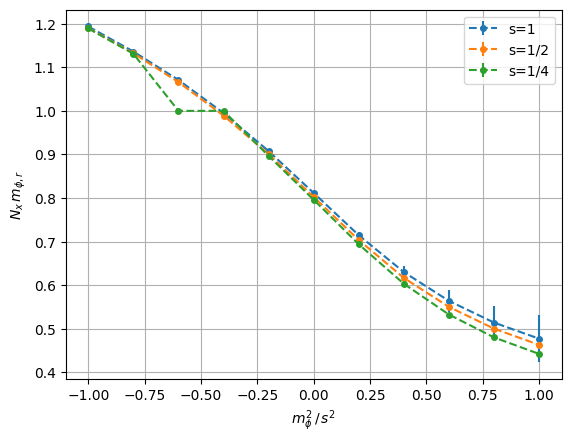

In [163]:
param = ("physics", "mass")

# s = 1.0
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 1:
        Nx = s.Nx
        val, err = s.compute_mqphys(printing=False)
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2 for m2 in params], [v for v in vals], errs, fmt='o--', markersize=4, label="s=1")

# s = 0.5
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.5:
        Nx = s.Nx
        val, err = s.compute_mqphys(printing=False)
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2/0.5/0.5 for m2 in params], [v for v in vals], errs, fmt='o--', markersize=4, label="s=1/2")

# s = 0.25
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.25:
        Nx = s.Nx
        val, err = s.compute_mqphys(printing=False)
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2/0.25/0.25 for m2 in params], [v for v in vals], errs, fmt='o--', markersize=4, label="s=1/4")

plt.legend()
plt.grid()
plt.xlabel(r"$m_\phi^2 \, / \, s^2$")
plt.ylabel(r"$ N_x \, m_{\phi, r} $");